# Titanic - Machine Learning from Disaster

#**Titanic - Machine Learning from Disaster**

#### **Project Goal**  
The objective of this project is to develop a machine learning model that predicts which passengers survived the Titanic shipwreck.

---

### **Overview**  
The dataset is divided into two subsets:  

- **Training Set (`train.csv`)**:  
  This dataset is used to train machine learning models. It includes both passenger features and their survival status (ground truth). The model will learn patterns from the features, such as passenger gender, class, and other attributes. Additional feature engineering can be applied to create new informative features.

- **Test Set (`test.csv`)**:  
  This dataset is used to evaluate the model’s performance on unseen data. It contains the same features as the training set but does **not** include the survival outcome. The task is to predict whether each passenger in the test set survived the Titanic disaster using the trained model.

Additionally, the dataset includes **`gender_submission.csv`**, which provides a sample submission assuming that all female passengers survived. This serves as a reference format for submission files.

---

### **Data Dictionary**  
The dataset contains the following variables:

| **Variable**  | **Definition**                                | **Key**                      |
|--------------|---------------------------------------------|-----------------------------|
| `survival`   | Survival outcome                           | 0 = No, 1 = Yes             |
| `pclass`     | Ticket class (proxy for socio-economic status) | 1 = 1st, 2 = 2nd, 3 = 3rd  |
| `sex`        | Passenger gender                           | Male/Female                 |
| `age`        | Age of the passenger                      | Numeric                     |
| `sibsp`      | Number of siblings/spouses aboard         | Numeric                     |
| `parch`      | Number of parents/children aboard        | Numeric                     |
| `ticket`     | Ticket number                            | Alphanumeric                 |
| `fare`       | Passenger fare                           | Numeric                      |
| `cabin`      | Cabin number                             | Alphanumeric (some missing)  |
| `embarked`   | Port of embarkation                      | C = Cherbourg, Q = Queenstown, S = Southampton |

---

### **Variable Notes**  
- **`pclass`**: Represents socio-economic status (SES):  
  - 1st = Upper class  
  - 2nd = Middle class  
  - 3rd = Lower class  

- **`age`**:  
  - If the age is **less than 1 year**, it is represented as a fraction.  
  - If the age is estimated, it is noted as `xx.5`.  

- **`sibsp`**: Number of family members aboard, defined as:  
  - **Sibling**: Brother, sister, stepbrother, stepsister.  
  - **Spouse**: Husband, wife (mistresses and fiancés were not included).  

- **`parch`**: Number of family members aboard, defined as:  
  - **Parent**: Mother, father.  
  - **Child**: Son, daughter, stepson, stepdaughter.  
  - **Note**: Some children traveled only with a nanny, so their `parch` value is `0`.  

---

## **Project Execution Plan**  

#**1. Data Loading & Initial Inspection**
   - Load the dataset (`train.csv`, `test.csv`) and verify successful loading.
   - Explore the dataset structure, check feature types, and inspect a few samples.
   - Identify missing values, inconsistencies, or formatting issues.

#**2. Data Preprocessing**
   - Investigate missing values and decide on appropriate handling strategies (e.g., imputation, removal).
   - Identify and remove duplicate records if they exist.
   - Convert data types where necessary (e.g., categorical encoding).
   - Standardize and clean textual or categorical variables (e.g., embarked port codes).

#**3. Exploratory Data Analysis (EDA)**
   - Visualize distributions of numerical and categorical variables.
   - Identify anomalies and outliers in numerical features.
   - Explore relationships between features and survival rate.
   - Perform feature selection to identify the most important predictors.

#**4. Data Preparation & Feature Engineering**
   - Create a data preprocessing pipeline to automate transformations:
     - Handle missing values.
     - Encode categorical variables (e.g., one-hot encoding for `embarked`).
     - Scale numerical features for models that require it.
   - Generate new features based on insights from EDA:
     - **Family size** (`sibsp + parch + 1`).
     - **Title extraction** from names.
     - **Cabin information** grouping (if usable).
     - **Age grouping** to capture age-related survival trends.

#**5. Model Training & Hyperparameter Tuning**
   - Split the dataset into training and validation subsets.
   - Train multiple machine learning models (e.g., Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, Neural Networks).
   - Tune hyperparameters using cross-validation.
   - Compare models based on performance metrics such as accuracy, precision, recall, and F1-score.
   - Handle class imbalance if necessary (e.g., through resampling techniques).

#**6. Model Evaluation & Selection**
   - Compare different models’ performance on validation data.
   - Choose the best-performing model based on accuracy and interpretability.
   - Analyze feature importance to understand which attributes contributed most to survival predictions.
   - Test the model on the unseen `test.csv` dataset.

#**7. Conclusion & Documentation**
   - Summarize findings from data exploration and feature engineering.
   - Provide insights into why certain features were important.
   - Justify model selection and compare it with baseline models (e.g., gender-based assumptions).
   - Suggest potential improvements for future iterations.
   - Format final submission file and validate results.

---

# Data loading

In [ ]:
# Standard libraries import
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Additional libraries import
import phik
import shap
from scipy.stats import (randint, uniform, shapiro, normaltest, kstest,
                         anderson)
from tqdm import tqdm

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder,
                                   StandardScaler, MinMaxScaler,
                                   LabelEncoder, FunctionTransformer,
                                   RobustScaler, QuantileTransformer,
                                   Normalizer, PowerTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import (roc_auc_score, accuracy_score, fbeta_score,
                             make_scorer)
from sklearn.linear_model import (LinearRegression, LogisticRegression,
                                   Ridge, Lasso, ElasticNet)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.utils import Bunch
from sklearn.feature_selection import SelectKBest, f_classif
from xgboost import XGBClassifier

# Constants
RANDOM_STATE = 42

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load datasets
test = pd.read_csv("/home/nickolas/data_science/titanic/source/test.csv")
train = pd.read_csv("/home/nickolas/data_science/titanic/source/train.csv")
gender_sub = pd.read_csv("/home/nickolas/data_science/titanic/source/gender_submission.csv")

# Check 5 first rows of each datasets
print("test.csv:")
display(test.head())
test.info()

print("train.csv:")
display(train.head())
train.info()

print("gender_sub.csv:")
display(gender_sub.head())
gender_sub.info()

test.csv:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
train.csv:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
gender_sub.csv:


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


#**🔹 Data Overview**
##**1. train.csv (Training Set)**
- **891 entries**, **12 columns** (including `Survived` as the target variable).
- **Issues Identified:**
  - `Age` → **177 missing values**.
  - `Cabin` → **687 missing values** (**very high!**).
  - `Embarked` → **2 missing values**.

##**2. test.csv (Test Set)**
- **418 entries**, **11 columns** (no `Survived` column).
- **Issues Identified:**
  - `Age` → **86 missing values**.
  - `Fare` → **1 missing value**.
  - `Cabin` → **327 missing values**.

##**3. gender_submission.csv (Submission Example)**
- **Contains only 2 columns:** `PassengerId` and `Survived`.
- This is a template assuming **all females survive** while **all males do not**.

---

Rename columns: lowercase and replace spaces with underscores

In [5]:
# Function to rename columns: lowercase and replace spaces with underscores
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df

# Apply column name transformation
train = clean_column_names(train)
test = clean_column_names(test)

Fill missing values in age, fare and embarked with the median of pclass and c|reate a binary feature cabin_known.

In [6]:
for dataset in [train, test]:
    dataset["age"] = dataset.groupby("pclass")["age"].transform(lambda x: x.fillna(x.median()))
    dataset["fare"] = dataset.groupby("pclass")["fare"].transform(lambda x: x.fillna(x.median()))
    
    # Fill embarked with the most frequent value (mode)
    dataset["embarked"] = dataset["embarked"].fillna(dataset["embarked"].mode()[0])

    # Create a binary feature cabin_known (1 if Cabin info exists, 0 otherwise)
    dataset["cabin_known"] = dataset["cabin"].notna().astype(int)

    # Remove the original cabin column
    dataset.drop(columns=["cabin"], inplace=True)

print("Processing complete.")

Processing complete.


In [7]:
# Check missing values
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
 11  cabin_known  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass  

Check duplicates

In [8]:
print(f'\ntrain duplicates: {train.duplicated().sum()}')
print(f'\ntest duplicates: {test.duplicated().sum()}')


train duplicates: 0

test duplicates: 0


# Exploratory Data Analysis (EDA)

## Statistical analysis of quantitative features

In [9]:
print("train statistical analysis:")
display(train.drop(columns='passengerid', errors='ignore').describe())

print("test statistical analysis:")
display(train.drop(columns='passengerid', errors='ignore').describe())

train statistical analysis:


,survived,pclass,age,sibsp,parch,fare,cabin_known
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


test statistical analysis:


,survived,pclass,age,sibsp,parch,fare,cabin_known
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### **Key Insights from Statistical Analysis of the Titanic Dataset**

#### **1. Survival Rate (`survived`)**
- **Mean: 0.38 (≈ 38.4%)** → Around **38% of passengers survived**, meaning **62% perished**.
- The dataset is **imbalanced**, with more non-survivors than survivors.
- The `survived` column only exists in the training dataset (not in test).

#### **2. Passenger Class Distribution (`pclass`)**
- **Mean: 2.31**, which suggests that most passengers belonged to **lower classes (2nd and 3rd)**.
- **25% percentile is in 2nd class, and the median (50%) is in 3rd class** → Majority of passengers traveled in **3rd class**.
- Since ticket class could be linked to socio-economic status, it might be **a strong predictor of survival**.

#### **3. Age Distribution (`age`)**
- **Mean: 29 years**, with a **standard deviation of 13.2 years**.
- **Range: 0.42 - 80 years** → The youngest passenger was **an infant**, and the oldest was **80 years old**.
- **50% of passengers were younger than 26 years old**.
- **Possible Impact**: Children and elderly might have different survival rates.

#### **4. Family Connections (`sibsp` and `parch`)**
- **Most passengers traveled alone**:  
  - **50% had no siblings or spouses (`sibsp = 0`)**.
  - **50% had no parents or children (`parch = 0`)**.
- **Max values**: Some passengers had up to **8 siblings/spouses** or **6 parents/children**.
- **Possible Impact**: Family connections might have influenced survival (e.g., women/children helped first).

#### **5. Fare Distribution (`fare`)**
- **Mean: 32.20** with a **high standard deviation (49.69)**.
- **25% percentile: 7.91, 50%: 14.45, 75%: 31.00** → Most fares were **relatively low**.
- **Max fare: 512.33** → Some first-class passengers paid significantly more.
- **Possible Impact**: Higher ticket prices might indicate **wealth and higher survival chances**.

#### **6. Cabin Information (`cabin_known`)**
- **Only ~22.9% of passengers had cabin information** (`cabin_known = 1`).
- Most passengers (77.1%) had missing cabin data (`cabin_known = 0`), likely 3rd-class passengers.
- **Possible Impact**: Knowing the cabin number may correlate with **first-class passengers**, who might have had **better survival odds**.

---

## Grapfics and summaries

### Quantitative features

Train plots:


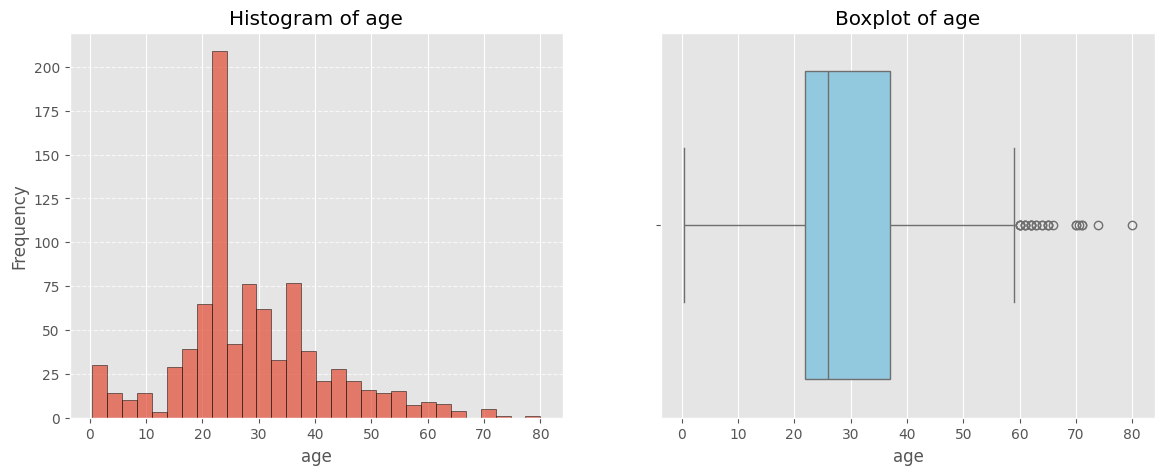

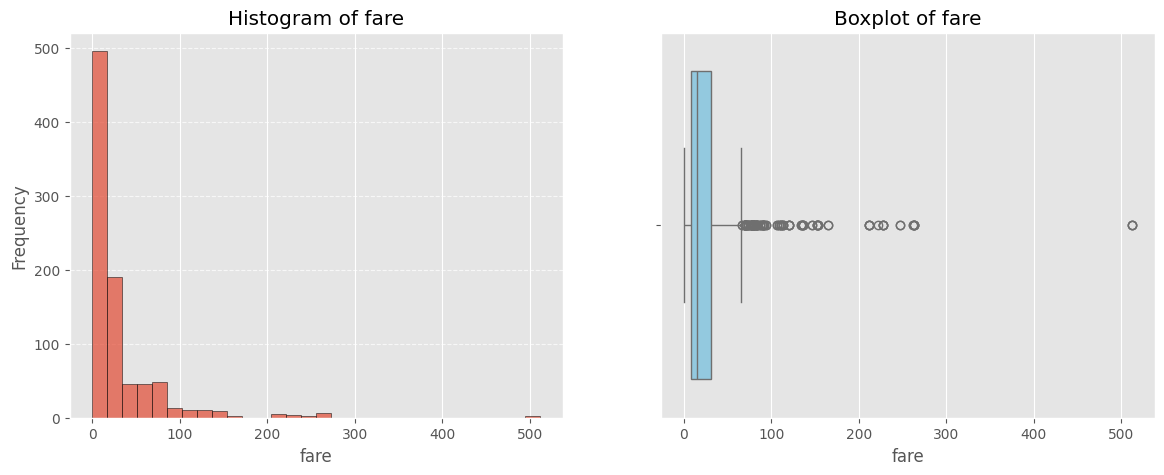

Test plots:


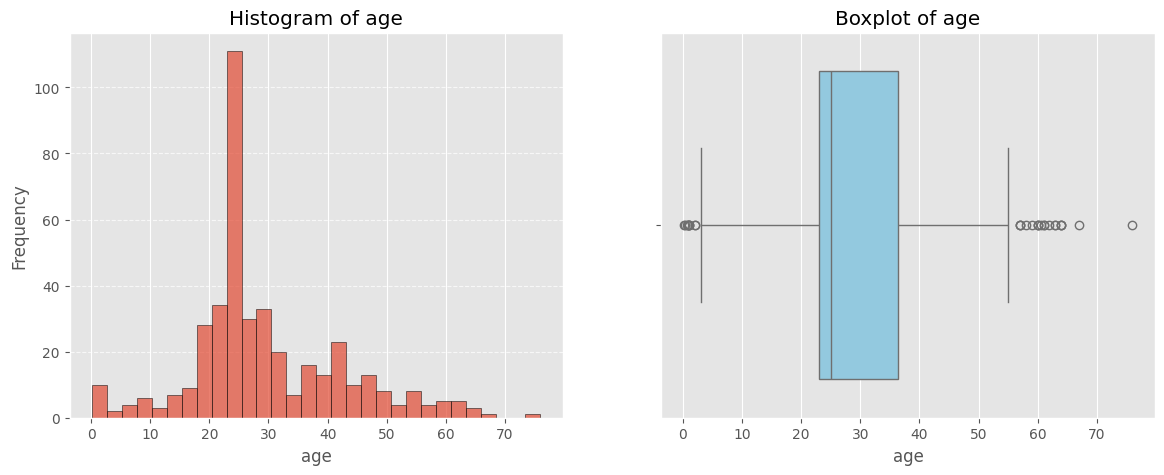

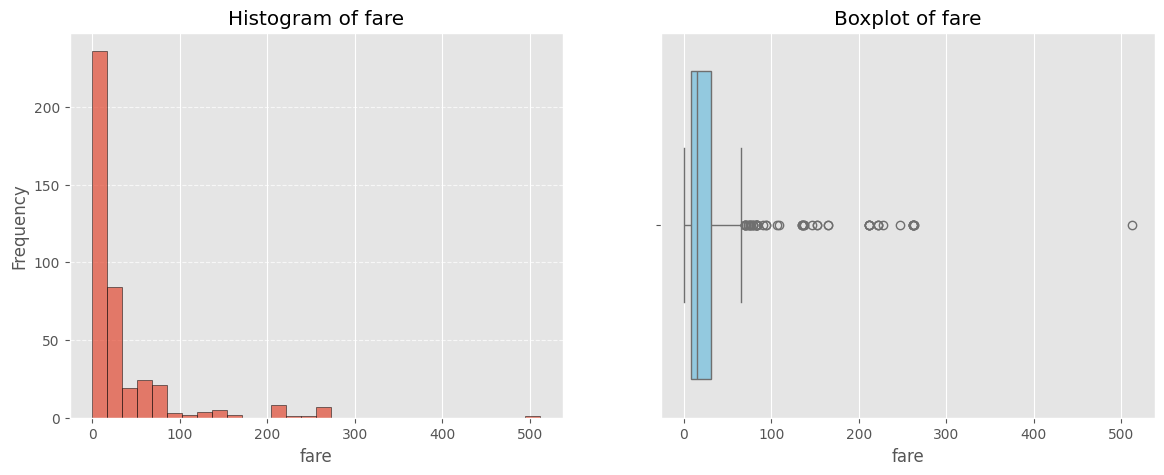

In [10]:
# Numerical columns to plot
numerical_columns = ["age", "fare"]

# Set the plot style
plt.style.use("ggplot")

def plot_numerical_features(data, dataset_name):
    """Plots histograms and boxplots for numerical features."""
    print(f"{dataset_name} plots:")
    for col in numerical_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram
        axes[0].hist(data[col], bins=30, edgecolor="black", alpha=0.7)
        axes[0].set_title(f"Histogram of {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # Boxplot
        sns.boxplot(x=data[col], ax=axes[1], color="skyblue")
        axes[1].set_title(f"Boxplot of {col}")

        plt.show()

# Generate plots for both datasets
plot_numerical_features(train, "Train")
plot_numerical_features(test, "Test")

Train plots:


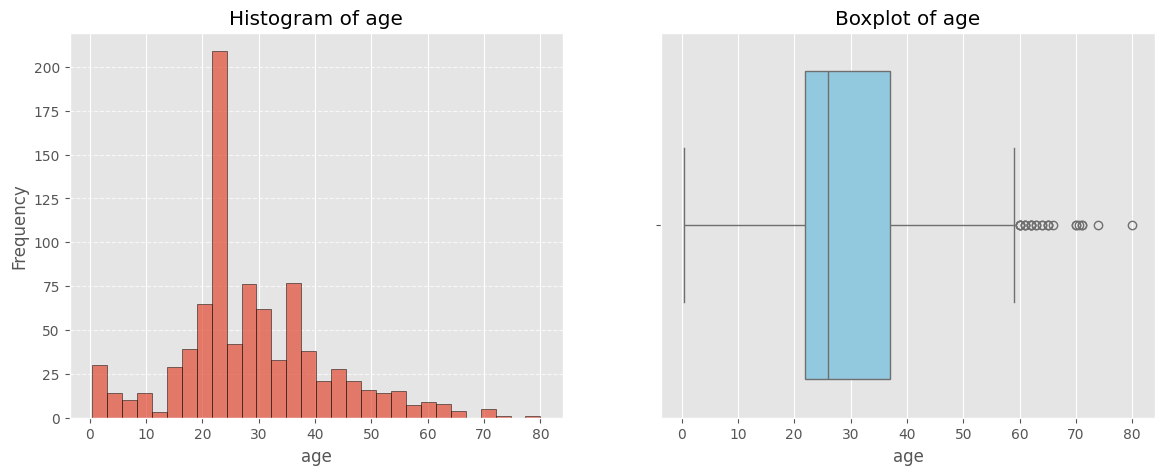

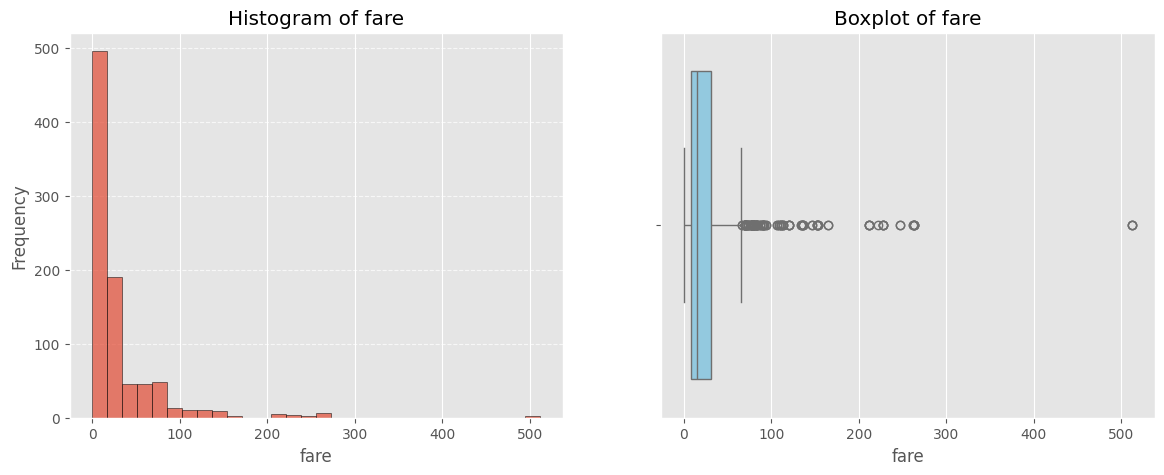

Test plots:


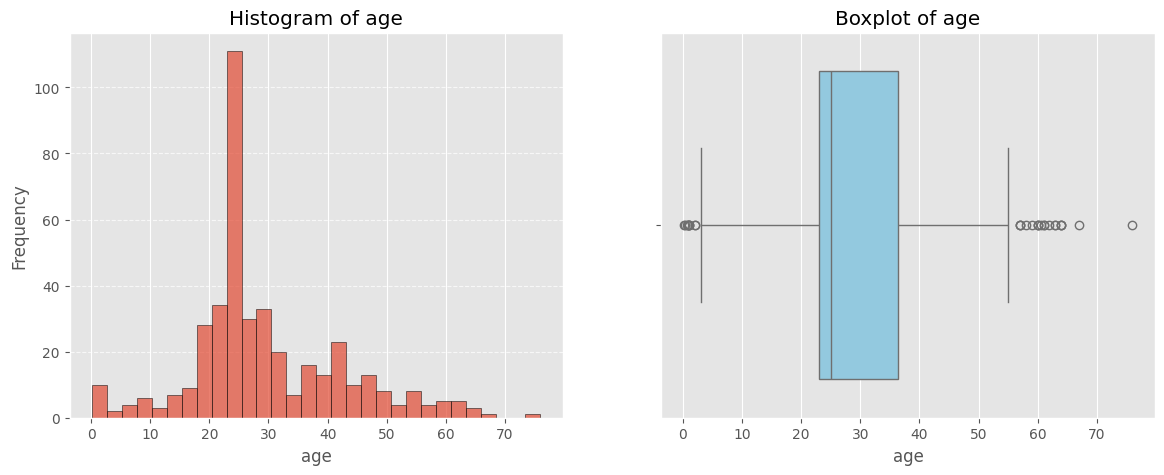

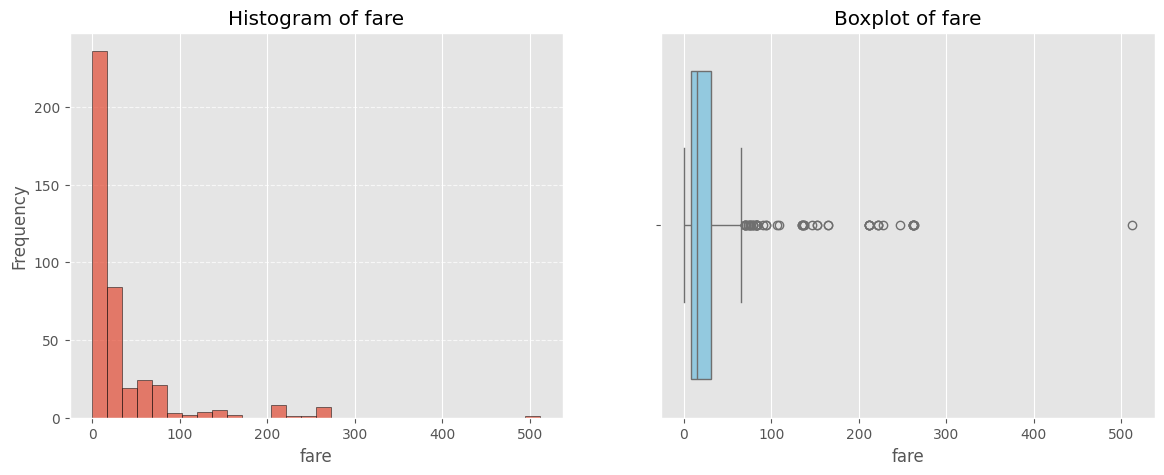

In [11]:
# Numerical columns to plot
numerical_columns = ["age", "fare"]

# Set the plot style
plt.style.use("ggplot")

def plot_numerical_features(data, dataset_name):
    """Plots histograms and boxplots for numerical features."""
    print(f"{dataset_name} plots:")
    for col in numerical_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Histogram
        axes[0].hist(data[col], bins=30, edgecolor="black", alpha=0.7)
        axes[0].set_title(f"Histogram of {col}")
        axes[0].set_xlabel(col)
        axes[0].set_ylabel("Frequency")
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # Boxplot
        sns.boxplot(x=data[col], ax=axes[1], color="skyblue")
        axes[1].set_title(f"Boxplot of {col}")

        plt.show()

# Generate plots for both datasets
plot_numerical_features(train, "Train")
plot_numerical_features(test, "Test")


### **Quantitative features overall Summary**

**1. Survival Rate & Class Distribution**
- **Only 38% of passengers survived**, making the dataset **imbalanced** with more non-survivors than survivors.
- **Most passengers traveled in 3rd class**, indicating that lower socio-economic status was more common.
- **Ticket class (`pclass`) is likely a strong predictor of survival**, as wealthier passengers (1st class) may have had better access to lifeboats.

**2. Age & Family Influence on Survival**
- The **average age of passengers was 29 years**, but there is **a wide spread from 0.42 to 80 years**.
- **50% of passengers were younger than 26 years old**, suggesting a younger population.
- **Most passengers traveled alone**, with 50% having **no siblings, spouses, parents, or children aboard**.
- **Passengers with family connections (sibsp, parch) may have had higher survival chances**, especially women and children.

**3. Ticket Fare & Socio-Economic Impact**
- **Average fare was $32.20**, but there is **a very high variance**.
- **Most fares were relatively low**, with 75% of passengers paying **less than $31**.
- **Some passengers paid over $500**, indicating a huge disparity in socio-economic status.
- **Higher ticket prices may correlate with higher survival rates**, as wealthier passengers likely had better conditions and access to lifeboats.

**4. Cabin Information & Missing Data**
- **Only 22.9% of passengers had recorded cabin data**, meaning most passengers (likely 3rd class) had no assigned cabins.
- **Cabin information could be a strong indicator of survival**, as it likely correlates with class.

---

**Statistical Tests for Normality**
**1. Age Distribution**
- **Shapiro-Wilk, D’Agostino-Pearson, and Kolmogorov-Smirnov tests all reject normality** (p-value < 0.05).
- **The age distribution is not normal**.
- **Outliers detected** for passengers **58 years and older**.

**2. Fare Distribution**
- **Highly skewed distribution** (many passengers paid very low fares, while a few paid extreme amounts).
- **All normality tests reject normality** (p-value < 0.05).
- **Significant number of outliers above $80**, meaning **high-ticket passengers were rare**.

---

### Categorical features

In [12]:
# Remove the "ticket" column (as it is not a significant feature)
train.drop(columns=["ticket"], inplace=True)
test.drop(columns=["ticket"], inplace=True)

In [13]:
# Define categorical features
categorical_features_train = ['pclass', 'sex', 'sibsp', 'parch', 'cabin_known']
categorical_features_test = ['pclass', 'sex', 'sibsp', 'parch', 'cabin_known']

# Features that should be plotted vertically (bar chart with values on Y-axis)
vertical_features = ['sex', 'embarked']

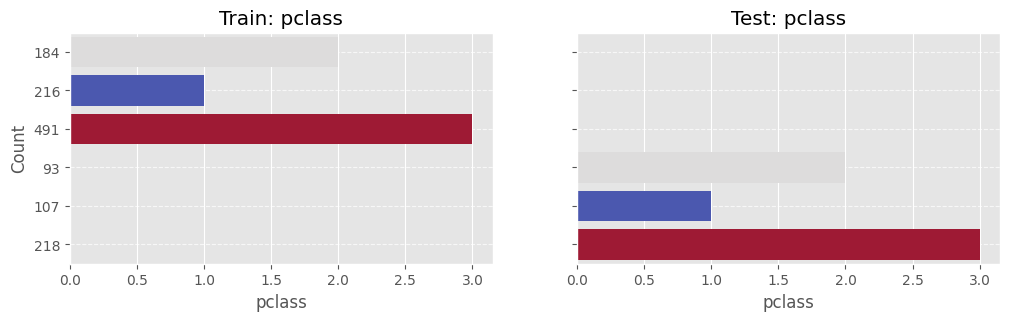

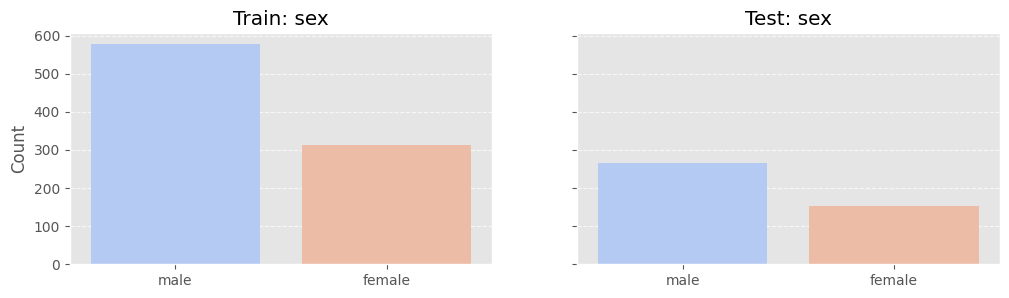

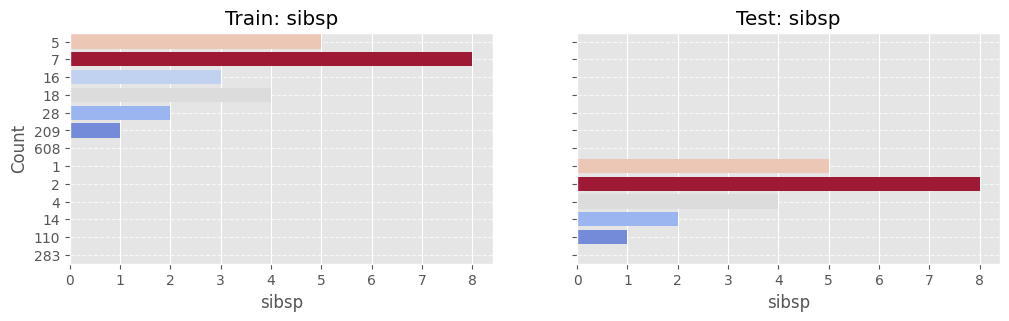

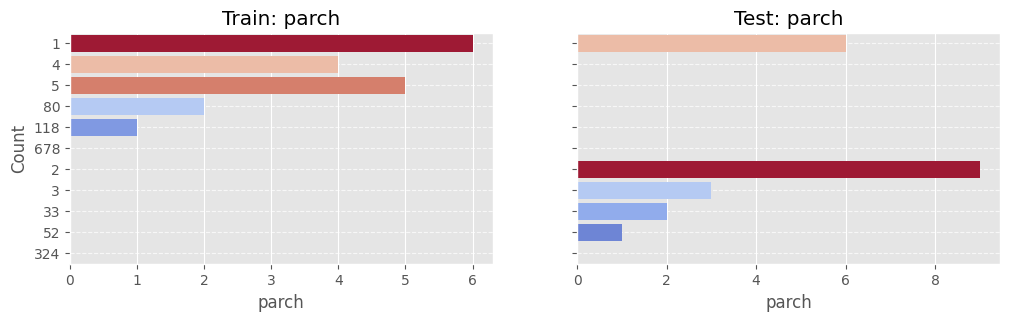

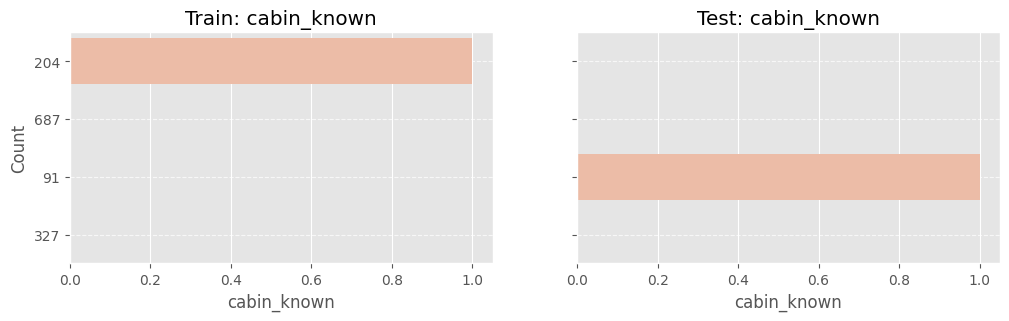

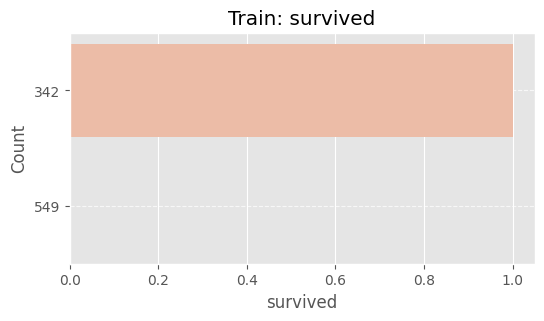

In [14]:
# Set the plot style
plt.style.use("ggplot")

def plot_categorical_features(train_data, test_data, train_features, test_features):
    """Plots side-by-side bar charts: horizontal for most, vertical for selected features."""
    for train_feature, test_feature in zip(train_features, test_features):
        fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

        # Train dataset (left)
        train_counts = train_data[train_feature].value_counts().reset_index()
        train_counts.columns = [train_feature, "count"]

        if train_feature in vertical_features:
            sns.barplot(x=train_feature, y="count", hue=train_feature, data=train_counts,
                        palette="coolwarm", dodge=False, legend=False, ax=axes[0])
            axes[0].set_xlabel("")
            axes[0].set_ylabel("Count")
        else:
            sns.barplot(y="count", x=train_feature, hue=train_feature, data=train_counts,
                        palette="coolwarm", dodge=False, legend=False, orient="h", ax=axes[0])
            axes[0].set_xlabel(train_feature)
            axes[0].set_ylabel("Count")

        axes[0].set_title(f"Train: {train_feature}")
        axes[0].grid(axis="y", linestyle="--", alpha=0.7)

        # Test dataset (right)
        test_counts = test_data[test_feature].value_counts().reset_index()
        test_counts.columns = [test_feature, "count"]

        if test_feature in vertical_features:
            sns.barplot(x=test_feature, y="count", hue=test_feature, data=test_counts,
                        palette="coolwarm", dodge=False, legend=False, ax=axes[1])
            axes[1].set_xlabel("")
            axes[1].set_ylabel("Count")
        else:
            sns.barplot(y="count", x=test_feature, hue=test_feature, data=test_counts,
                        palette="coolwarm", dodge=False, legend=False, orient="h", ax=axes[1])
            axes[1].set_xlabel(test_feature)
            axes[1].set_ylabel("Count")

        axes[1].set_title(f"Test: {test_feature}")
        axes[1].grid(axis="y", linestyle="--", alpha=0.7)

        plt.show()

    # Plot "survived" separately in Train (no corresponding Test plot)
    fig, ax = plt.subplots(figsize=(6, 3))  # Only one subplot for "survived"
    survived_counts = train_data["survived"].value_counts().reset_index()
    survived_counts.columns = ["survived", "count"]
    
    sns.barplot(y="count", x="survived", hue="survived", data=survived_counts,
                palette="coolwarm", dodge=False, legend=False, orient="h", ax=ax)
    
    ax.set_title("Train: survived")
    ax.set_ylabel("Count")
    ax.set_xlabel("survived")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Plot side-by-side categorical features for Train and Test datasets
plot_categorical_features(train, test, categorical_features_train, categorical_features_test)

### **Categorical features overall summary**

**1. Passenger Class (`pclass`)**
- **Train:** Majority of passengers were in **3rd class (55%)**, followed by **1st class (24%)** and **2nd class (21%)**.
- **Test:** Similar distribution, with **3rd class (52%)**, **1st class (25%)**, and **2nd class (23%)**.
- **Implication:** Lower-class passengers were the most common, and **ticket class may strongly impact survival** (wealthier passengers likely had better access to lifeboats).

**2. Gender Distribution (`sex`)**
- **Train:** **577 males (65%)** and **314 females (35%)**.
- **Test:** **266 males (64%)** and **152 females (36%)**.
- **Implication:** The dataset is **male-dominated**, and since historical accounts suggest **"women and children first"**, gender is likely a key survival factor.

**3. Number of Siblings/Spouses (`sibsp`)**
- **Train:** Majority **(68%) traveled alone (0 siblings/spouses)**, while **23% had 1 family member**.
- **Test:** Similar trend, **67% were alone**, and **26% had 1 family member**.
- **Implication:** **Most passengers were solo travelers**, and **family size might influence survival rates** (e.g., large families might struggle to stay together).

**4. Number of Parents/Children (`parch`)**
- **Train:** **76% had no parents/children onboard**, while **13% had 1 relative**.
- **Test:** **78% had no family onboard**, and **12% had 1 parent/child**.
- **Implication:** **Most passengers were independent travelers**, and families with children might have had priority in evacuations.

**5. Cabin Information (`cabin_known`)**
- **Train:** **687 passengers (77%) had no recorded cabin**, while **204 (23%) had cabin information**.
- **Test:** **327 passengers (78%) had no recorded cabin**, while **91 (22%) had cabin information**.
- **Implication:** **Cabin information is missing for most passengers**, likely because **lower-class passengers didn't have assigned cabins**. Cabin presence may correlate with survival.

**6. Survival Rate (`survived`)** *(Only in Train)*
- **Train:** **Survival rate is 38% (342 survived, 549 died)**.
- **Implication:** The dataset is **imbalanced**, with more deaths than survivors, which must be considered when training machine learning models.

---

## Correlation analysis

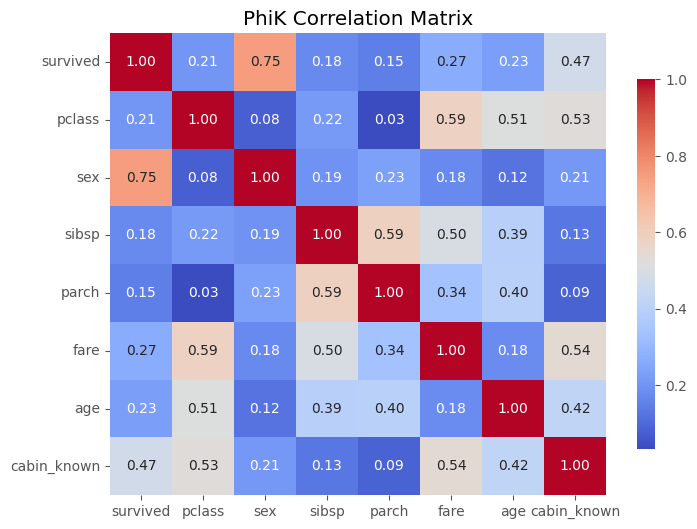

Highly Correlated Features (PhiK > 0.9):
Empty DataFrame
Columns: [feature_1, feature_2, phi_k_value]
Index: []


In [15]:
# Select both categorical and numerical features for PhiK correlation analysis
features_for_phik = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'age', 'cabin_known']

# Compute PhiK correlation matrix for train dataset
phik_corr = train[features_for_phik].phik_matrix(interval_cols=['fare', 'age'])

# Visualize the PhiK correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("PhiK Correlation Matrix")
plt.show()

# Filter correlations greater than 0.9, excluding self-correlations
high_corr = phik_corr.stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'phi_k_value']
high_corr = high_corr[(high_corr['phi_k_value'] > 0.9) & (high_corr['feature_1'] != high_corr['feature_2'])]

# Display highly correlated feature pairs
print("Highly Correlated Features (PhiK > 0.9):")
print(high_corr)

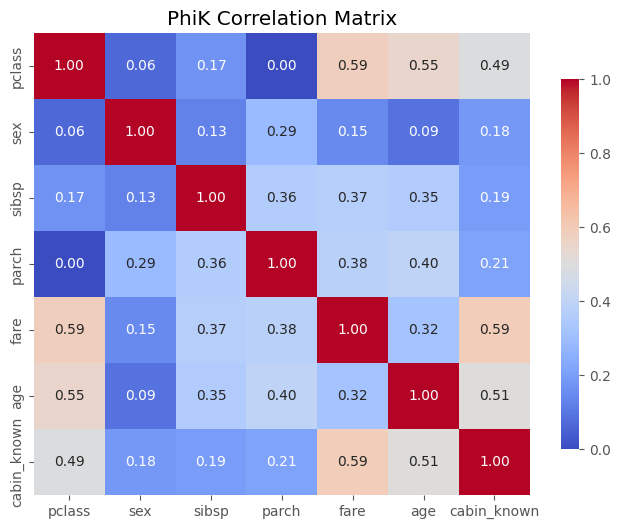

Highly Correlated Features (PhiK > 0.9):
Empty DataFrame
Columns: [feature_1, feature_2, phi_k_value]
Index: []


In [16]:
# Select both categorical and numerical features for PhiK correlation analysis
features_for_phik = ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'age', 'cabin_known']

# Compute PhiK correlation matrix for test dataset
phik_corr = test[features_for_phik].phik_matrix(interval_cols=['fare', 'age'])

# Visualize the PhiK correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(phik_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"shrink": 0.8})
plt.title("PhiK Correlation Matrix")
plt.show()

# Filter correlations greater than 0.9, excluding self-correlations
high_corr = phik_corr.stack().reset_index()
high_corr.columns = ['feature_1', 'feature_2', 'phi_k_value']
high_corr = high_corr[(high_corr['phi_k_value'] > 0.9) & (high_corr['feature_1'] != high_corr['feature_2'])]

# Display highly correlated feature pairs
print("Highly Correlated Features (PhiK > 0.9):")
print(high_corr)

### **Summary of PhiK Correlation Analysis**

**1. No Strongly Correlated Features (PhiK > 0.9)**
- The correlation analysis **did not identify any features with PhiK correlation greater than 0.9**.
- This suggests that **no two features are highly dependent on each other**, meaning there is no severe multicollinearity in the dataset.

**2. Key Correlations in the Train Dataset**
- **Survival Factors:**
  - **Sex (0.75):** **Strong correlation** between survival and being female, supporting the **"women and children first"** evacuation rule.
  - **Cabin Known (0.47):** Higher likelihood of survival when a cabin is assigned (likely indicating **first-class passengers**).
  - **Fare (0.26):** Passengers who paid higher fares had a **slightly higher survival rate**.

- **Other Notable Relationships:**
  - **SibSp and Parch (0.59):** Number of siblings/spouses aboard is **moderately correlated** with the number of parents/children.
  - **Fare and Pclass (0.58):** Higher class tickets were significantly more expensive.

**3. Key Correlations in the Test Dataset**
- **Pclass and Fare (0.59):** Strong correlation, confirming that **ticket class influences fare price**.
- **Age and Cabin Known (0.51):** Older passengers were **more likely to have a known cabin number**.
- **Parch and SibSp (0.36):** Families traveling together influenced both features.

---

# Pipelines